In [1]:
import numpy as np
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt

In [2]:
data1=pd.read_csv("mlfolder/CSV_Files/data6_processed.csv")

In [3]:
data1

,x,y,t
0,196.639686,392.623867,0
1,189.524100,398.693889,0
2,184.801730,398.852495,0
3,203.105518,360.183792,0
4,171.681678,358.061517,0
...,...,...,...
745,221.692783,289.130319,1
746,218.485170,271.634896,1
747,246.114055,266.707846,1
748,218.081652,295.938314,1


In [4]:
X=np.c_[data1["x"],data1["y"]]
y=data1['t']

In [5]:
X.shape

(750, 2)

In [6]:
y

0      0
1      0
2      0
3      0
4      0
      ..
745    1
746    1
747    1
748    1
749    1
Name: t, Length: 750, dtype: int64

In [7]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [8]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
predictions=knn.predict(X_test)

In [9]:
predictions

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0])

In [10]:
print("Accuracy: ",metrics.accuracy_score(y_test,predictions))

Accuracy:  0.9066666666666666


In [11]:
from sklearn.model_selection import GridSearchCV

In [12]:
param_grid={
    'n_neighbors':np.arange(1,21,2)
}
model=KNeighborsClassifier()

In [13]:
gridsearch=GridSearchCV(model,param_grid,cv=10,scoring='accuracy')

In [14]:
gridsearch.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19])},
             scoring='accuracy')

In [15]:
gridsearch.best_score_

np.float64(0.8816666666666666)

In [16]:
gridsearch.best_estimator_.n_neighbors

np.int64(15)

In [17]:
pr=gridsearch.predict(X_test)

In [18]:
np.sum(pr==y_test)/len(y_test)

np.float64(0.9133333333333333)

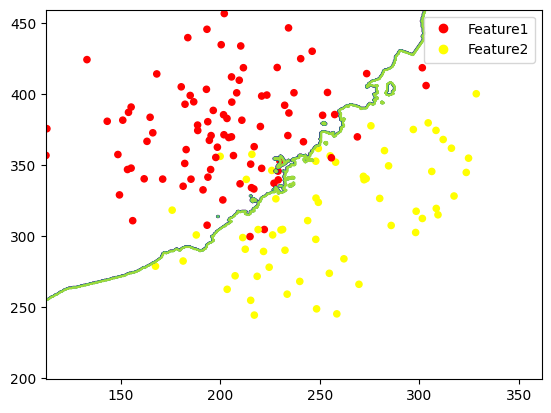

In [19]:
fig,ax=plt.subplots()
best_knn=gridsearch.best_estimator_
y_pred=best_knn.predict(X_test)
h=0.5
xmin=np.min(X[:,0])
xmax=np.max(X[:,0])
ymin=np.min(X[:,1])
ymax=np.max(X[:,1])
xx,yy=np.meshgrid(np.arange(xmin,xmax,h),np.arange(ymin,ymax,h))
Z=best_knn.predict(np.c_[xx.ravel(),yy.ravel()])
Z=Z.reshape(xx.shape)
plt.contour(xx,yy,Z)
scatter=plt.scatter(X_test[:,0],X_test[:,1],c=y_test,s=20,cmap='autumn')
classes=['Feature1','Feature2']
ax.legend(handles=scatter.legend_elements()[0], labels=classes)
plt.show()

In [20]:
X_train2,X_test2,y_train2,y_test2=train_test_split(X,y,test_size=0.1,random_state=4)

In [21]:
gridsearch.fit(X_train2,y_train2)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19])},
             scoring='accuracy')

In [22]:
gridsearch.best_score_

np.float64(0.8919227392449516)

In [23]:
gridsearch.best_estimator_.n_neighbors

np.int64(15)

In [24]:
pr2=gridsearch.predict(X_test2)

In [25]:
np.sum(pr2==y_test2)/len(y_test2)

np.float64(0.88)

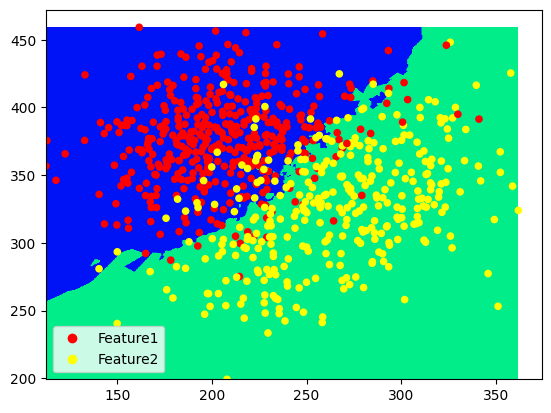

In [26]:
fig,ax=plt.subplots()
best_knn=gridsearch.best_estimator_
y_pred=best_knn.predict(X_test2)
h=0.5
xmin=np.min(X[:,0])
xmax=np.max(X[:,0])
ymin=np.min(X[:,1])
ymax=np.max(X[:,1])
xx,yy=np.meshgrid(np.arange(xmin,xmax,h),np.arange(ymin,ymax,h))
Z=best_knn.predict(np.c_[xx.ravel(),yy.ravel()])
Z=Z.reshape(xx.shape)
plt.contourf(xx,yy,Z,cmap='winter')
scatter=plt.scatter(X[:,0],X[:,1],c=y,s=20,cmap='autumn')
classes=['Feature1','Feature2']
ax.legend(handles=scatter.legend_elements()[0], labels=classes)
plt.show()

**Diabetes**

In [27]:
%config Completer.use_jedi = False  ## for mac

In [28]:
diabetes=pd.read_csv("mlfolder/CSV_Files/DiabetesData_PimaIndians - Copy.csv")

In [29]:
diabetes.head()

,Glucose,DiastolicPressue,BMI,Age,Diabetes
0,148,72,33.6,50,pos
1,85,66,26.6,31,neg
2,183,64,23.3,32,pos
3,89,66,28.1,21,neg
4,137,40,43.1,33,pos


In [38]:
X=np.array(diabetes.drop('Diabetes',axis=1))
y=diabetes['Diabetes']

In [39]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [40]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [41]:
svc=SVC(gamma='scale')

In [42]:
param_grid={
    'kernel':['linear','rbf','poly'],
    'degree':[2,3,4],
    'C':[1,10,50,100,1000]
}

In [43]:
gridsearch2=GridSearchCV(svc,param_grid,cv=5,scoring='accuracy')

In [44]:
gridsearch2.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [1, 10, 50, 100, 1000], 'degree': [2, 3, 4],
                         'kernel': ['linear', 'rbf', 'poly']},
             scoring='accuracy')

In [46]:
gridsearch2.best_score_

np.float64(0.7686206896551724)

In [47]:
gridsearch2.best_estimator_

SVC(C=50, kernel='poly')

In [48]:
gridsearch2.best_params_

{'C': 50, 'degree': 3, 'kernel': 'poly'}

In [49]:
best_model=gridsearch2.best_estimator_

In [57]:
predictions2=best_model.predict(X_test)

In [58]:
print('SVC', metrics.classification_report(y_test,predictions2))

SVC               precision    recall  f1-score   support

         neg       0.84      0.89      0.87       102
         pos       0.70      0.60      0.65        43

    accuracy                           0.81       145
   macro avg       0.77      0.75      0.76       145
weighted avg       0.80      0.81      0.80       145



In [59]:
gridsearch2.best_estimator_.decision_function

<bound method BaseSVC.decision_function of SVC(C=50, kernel='poly')>

In [60]:
from sklearn.linear_model import LogisticRegression

In [61]:
lr=LogisticRegression()

In [62]:
lr.fit(X_train,y_train)

LogisticRegression()

In [63]:
print("LR:", metrics.classification_report(y_test,lr.predict(X_test)))

LR:               precision    recall  f1-score   support

         neg       0.84      0.89      0.87       102
         pos       0.70      0.60      0.65        43

    accuracy                           0.81       145
   macro avg       0.77      0.75      0.76       145
weighted avg       0.80      0.81      0.80       145

